In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [32]:
months = ['nov', 'dec', 'jan', 'feb', 'mar']
ppi = pd.read_csv('input/ppi.csv', sep=';')
ppi.sort_values(by='Country',inplace=True)
weights = pd.read_csv('input/weights.csv')
errors = dict()

for i in range(len(months)):
    df = pd.read_json('input/point_estimates_'+months[i]+'.json')
    df['original'] = ppi[months[i]].values
    df['month'] = months[i]
    df_lev = df.copy()
    df['weights'] = weights['Weights'].values
    for entries in [col for col in df.columns if col.startswith('entry')]:
        df[entries+'_error'] = (df[entries]-df['original'])**2 # squared error
        df[entries+'_rel_error'] = ((df[entries]-df['original'])/df['original'])**2 # relative error squared
    for error in [col for col in df.columns if col.endswith('error')]:
        if error.endswith('rel_error'):
            errors[months[i]+error] = np.mean(df[error])
            errors[months[i]+error+'_w'] = np.mean(df[error]*df['weights'])
        errors[months[i]+error] = np.sqrt(np.mean(df[error]))
        errors[months[i]+error+'_w'] = np.sqrt(np.mean(df[error]*df['weights']))

    levels = levels.append(df_lev)
    
    

c:\Users\bud07581\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


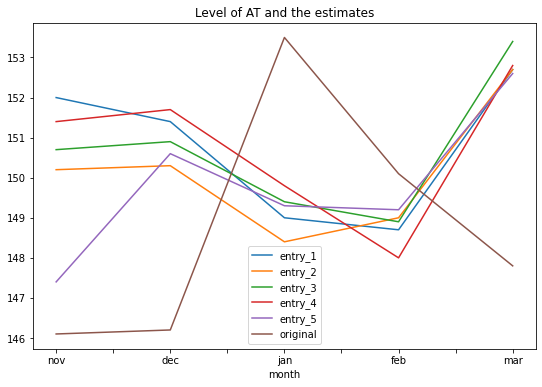

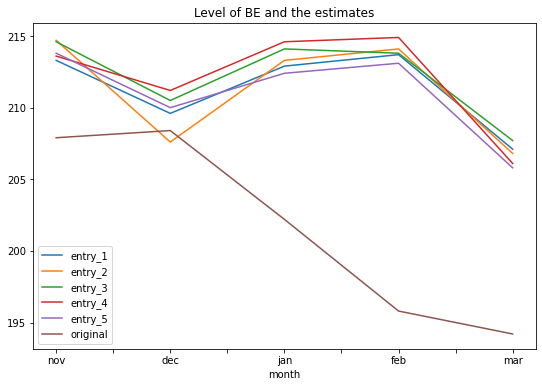

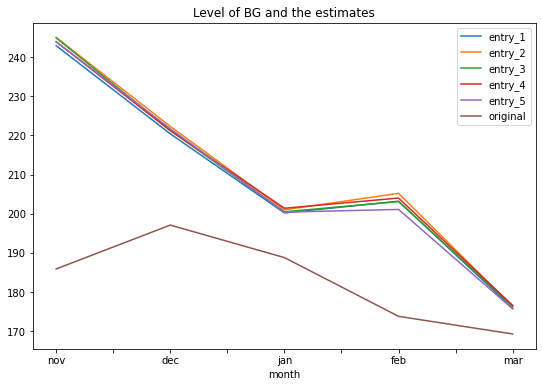

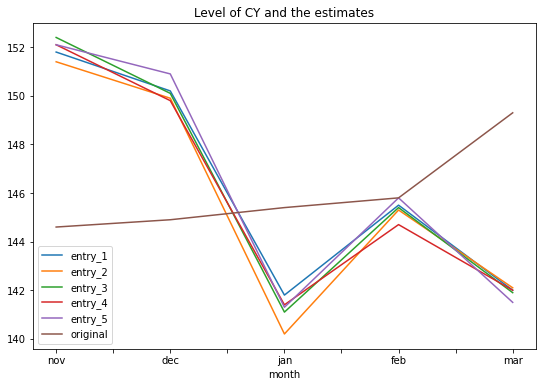

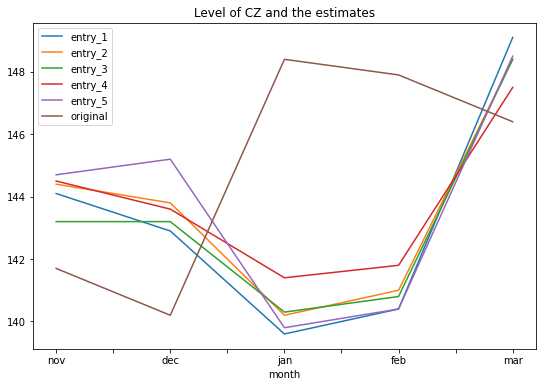

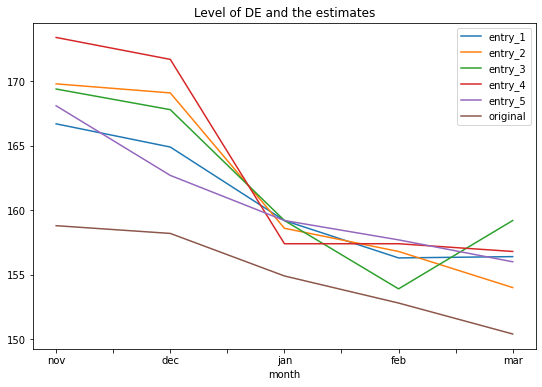

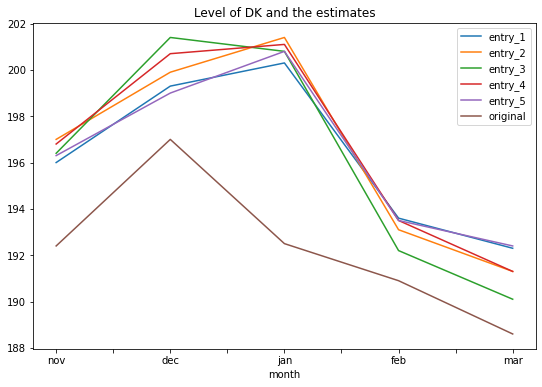

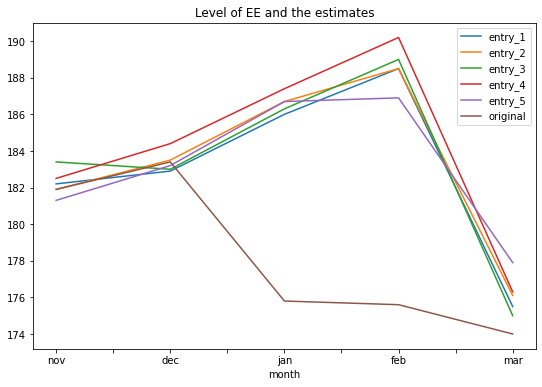

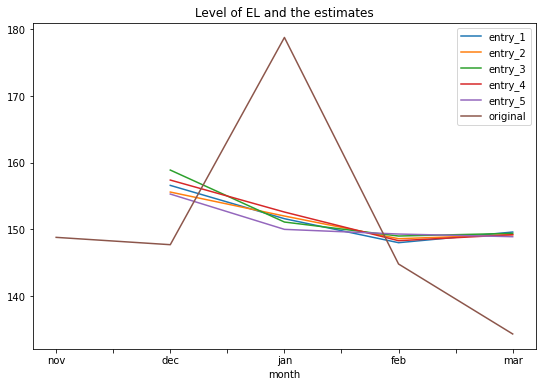

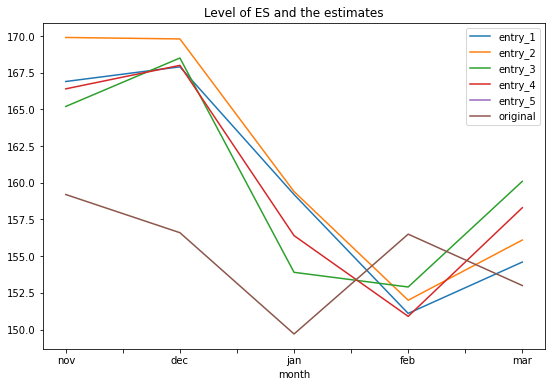

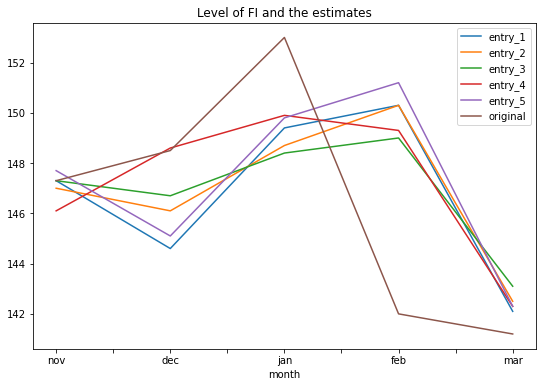

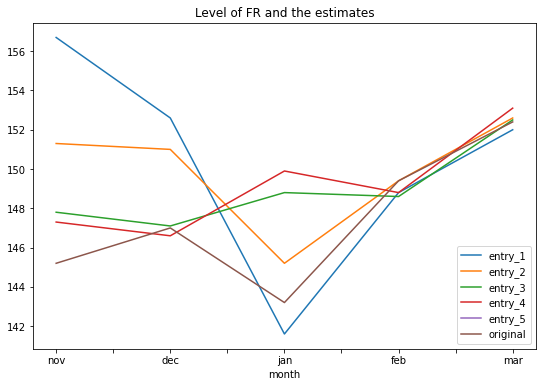

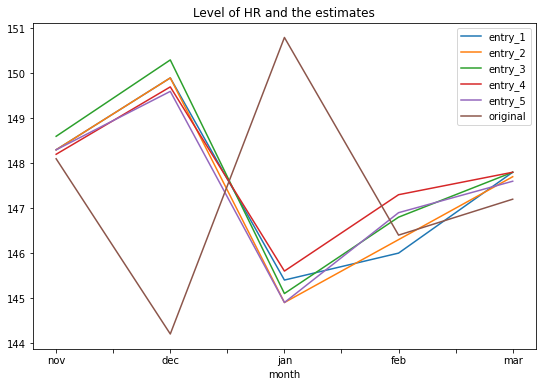

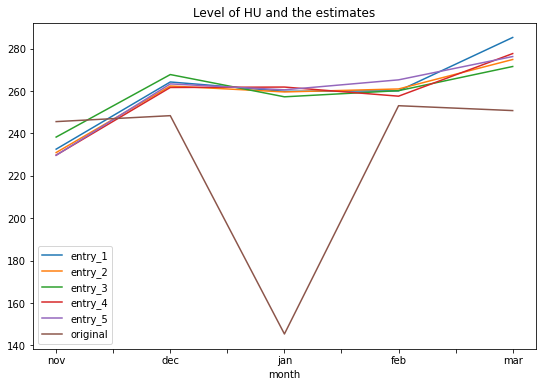

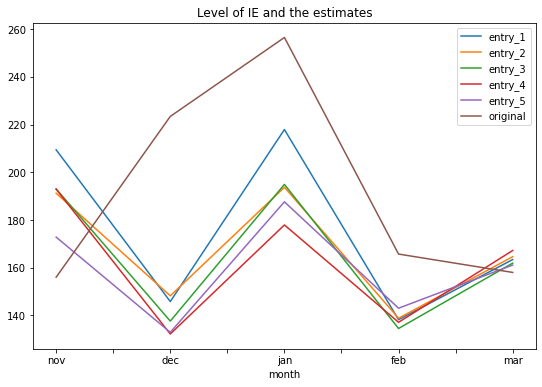

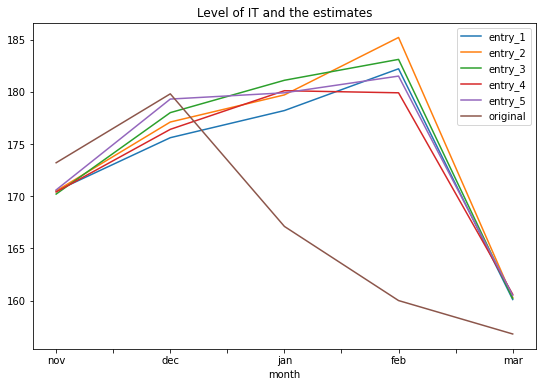

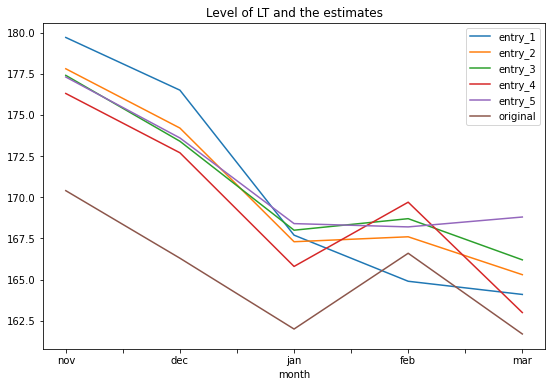

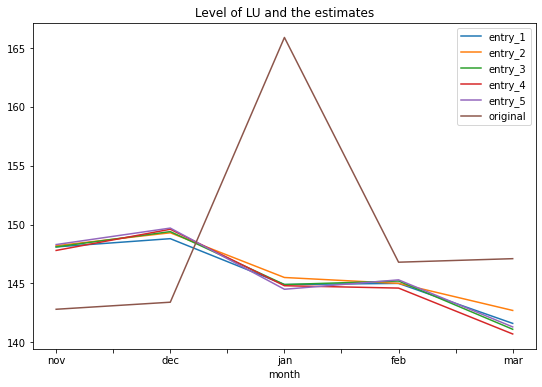

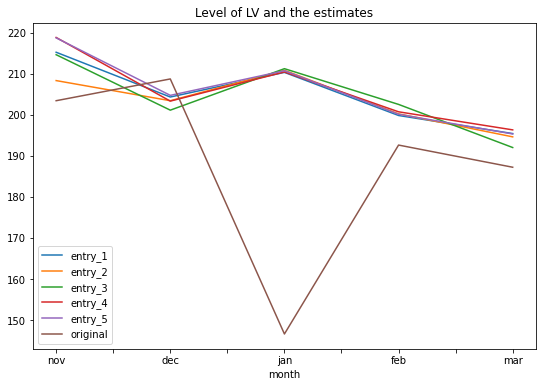

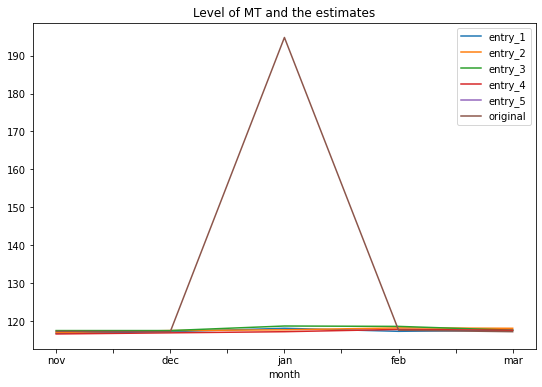

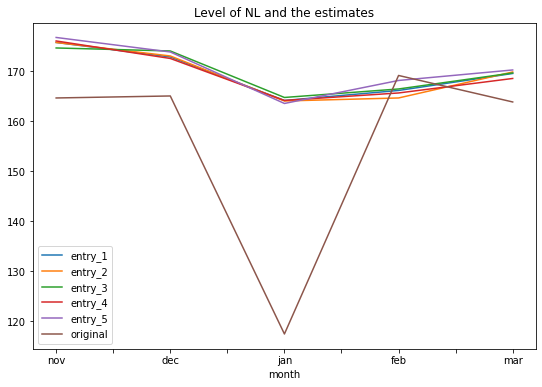

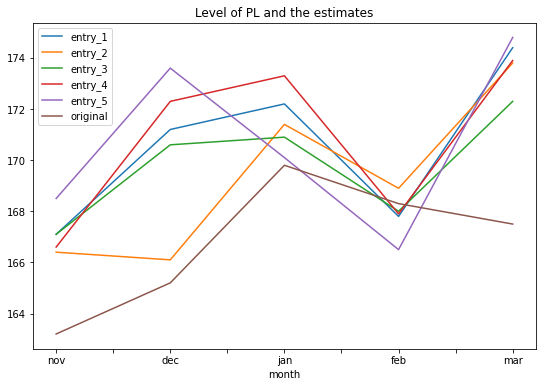

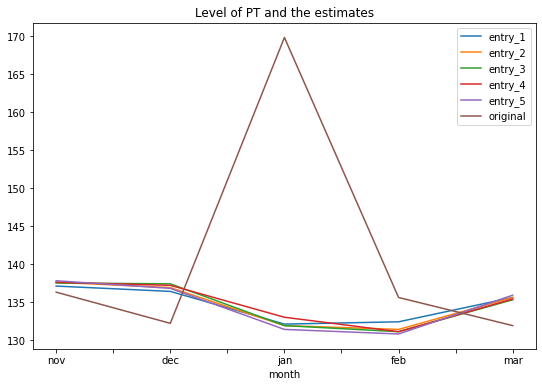

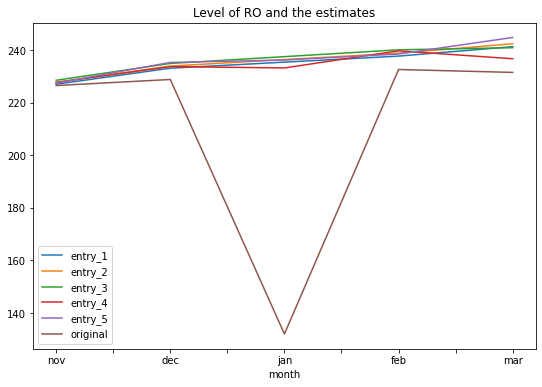

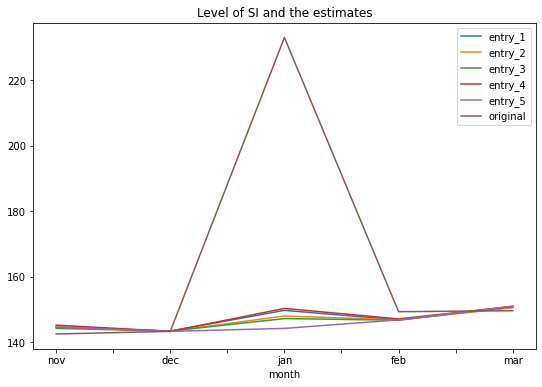

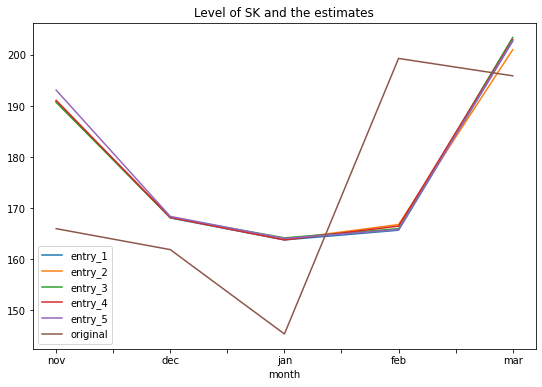

In [57]:
for i in levels.index:
    if os.path.exists('output/plots/'+i+'.png'):
        continue
    levels.loc[i,:].plot(x='month', figsize=(9,6), title='Level of '+i+' and the estimates')
    plt.savefig('output/plots/'+i+'.png')

In [32]:
np.mean(np.mean(ppi))

c:\Users\bud07581\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


165.20982905982905

In [21]:
errors

{'noventry_1_error': 9.31338986455688,
 'noventry_1_error_w': 9.792939175360367,
 'noventry_1_rel_error': 0.051240416906488465,
 'noventry_1_rel_error_w': 0.0537847169708851,
 'noventry_2_error': 9.388208643743575,
 'noventry_2_error_w': 9.959039380613744,
 'noventry_2_rel_error': 0.05164014255736408,
 'noventry_2_rel_error_w': 0.05492624271930051,
 'noventry_3_error': 10.393877635786001,
 'noventry_3_error_w': 10.939923182123781,
 'noventry_3_rel_error': 0.05728364391147144,
 'noventry_3_rel_error_w': 0.06007700363374909,
 'noventry_4_error': 10.39432167468965,
 'noventry_4_error_w': 10.887080028109533,
 'noventry_4_rel_error': 0.059365180084431875,
 'noventry_4_rel_error_w': 0.06213520705905798,
 'noventry_5_error': 10.818924643178848,
 'noventry_5_error_w': 11.194328727180288,
 'noventry_5_rel_error': 0.0607207051051414,
 'noventry_5_rel_error_w': 0.06248182384980512,
 'decentry_1_error': 17.051201175825167,
 'decentry_1_error_w': 18.110234038329732,
 'decentry_1_rel_error': 0.08056

In [24]:
errors_df = pd.DataFrame(errors, index=[key[0:3] for key in errors])

In [25]:
errors_df = errors_df.drop_duplicates(keep='first')

In [27]:
errors_df.to_csv('output/errors.csv')